### Projeto - Crimes em Boston

- __Nome:__ Gustavo Rezende Melo
- __Disciplina:__ Mineração de Dados
- __Projeto:__ Crimes em Boston

## Fase 1

### Importação das bibliotecas principais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.stats.proportion import proportions_ztest

### Importação da base de dados

In [2]:
crimes = pd.read_csv('C:\\Users\\Gustavo\\OneDrive\\MBA\\MBA Data Science\\Projeto B2\\crimes\\crimes1.csv', sep=';', parse_dates=['OCCURRED_ON_DATE'])

Vamos verificar as 5 primeiras linhas da base de dados:

In [3]:
crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


### Pré Processamento

Primeiro, vamos verificar as estatísticas descritivas dos dados numéricos da base de dados. 
<br>
<br>É importante entender quais os valores médios, máximos e mínimos dos dados porque podem ser um sinal de preenchimento errado.
<br>
<br>Também é importante fazer uma leitura dos dados: se a média e a mediana estão muito diferentes, pode indicar a presença de valores extremos que estão movendo a média. O desvio padrão também nos dá a informação do tanto que os valores estão longe da média.

In [4]:
crimes.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,65534.000000,65534.000000,65534.000000,65534.000000,61343.000000,61343.000000
mean,2355.983306,2017.989334,4.747047,13.071734,42.143875,-70.795129
std,1175.364561,0.116900,2.334880,6.280269,2.771171,4.482805
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1102.000000,2018.000000,3.000000,9.000000,42.296420,-71.097379
50%,3006.000000,2018.000000,5.000000,14.000000,42.325033,-71.077720
75%,3202.000000,2018.000000,7.000000,18.000000,42.348306,-71.062482
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


A coluna de OFFENSE_CODE não nos traz muita informação útil. Já com as demais nos levam a pensar que: 
- A coluna de ano nos mostra que os dados estão bastante concentrados em 2018, o que vamos verificar mais abaixo.
- A coluna de mês nos mostra que existem ocorrencias em todos os meses, mas estão centrados no mês 5. Também vamos verificar.
- A coluna de horas nos mostra que a média está próxima da mediana, mas o desvio padrão é bem alto. Verificaremos mais a frente.

Agora, vamos verificar a quantidade de valores de cada coluna. Isso nos trará a informação se existem muitos valores NaN e como iremos tratá-los.

In [5]:
crimes.count()

INCIDENT_NUMBER        65534
OFFENSE_CODE           65534
OFFENSE_CODE_GROUP     65534
OFFENSE_DESCRIPTION    65534
DISTRICT               64970
REPORTING_AREA         65534
SHOOTING                 180
OCCURRED_ON_DATE       65534
YEAR                   65534
MONTH                  65534
DAY_OF_WEEK            65534
HOUR                   65534
UCR_PART               65519
STREET                 64398
Lat                    61343
Long                   61343
Location               65534
dtype: int64

Vemos que temos valores faltantes de Distrito, tiroteio, UCR, nome de rua, Latitude e Longitude. Neste primeiro momento o foco será nos dados de distrito.

Acrescentando a coluna "ID" para enumerar as ocorrências 

In [6]:
crimes['ID']=range(1,65535)

In [7]:
crimes.set_index(['ID'])

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
ID,,,,,,,,,,,,,,,,,
1,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
2,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
3,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
4,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
5,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,I182000787,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,94,NaN,2018-01-03 19:00:00,2018,1,Wednesday,19,Part Two,CLINTON ST,42.360680,-71.054823,"(42.36067984, -71.05482325)"
65531,I182000786,3114,Investigate Property,INVESTIGATE PROPERTY,C11,461,NaN,2018-01-03 20:09:00,2018,1,Wednesday,20,Part Three,BOWDOIN AVE,42.303112,-71.077075,"(42.30311230, -71.07707510)"
65532,I182000785,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,C11,355,NaN,2018-01-03 19:48:00,2018,1,Wednesday,19,Part Three,ADAMS ST,42.296045,-71.056355,"(42.29604546, -71.05635478)"


Agora, vamos verificar todos os valores que aparecem na coluna "DISTRICT".

In [8]:
distrito = crimes['DISTRICT'].unique()

In [9]:
distrito

array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', nan, 'A1', 'E5', 'A7', 'E13',
       'E18', 'A15'], dtype=object)

Como temos valores "nan", vamos substitui-los por "Undefined" para serem contados.

In [10]:
crimes.count()

INCIDENT_NUMBER        65534
OFFENSE_CODE           65534
OFFENSE_CODE_GROUP     65534
OFFENSE_DESCRIPTION    65534
DISTRICT               64970
REPORTING_AREA         65534
SHOOTING                 180
OCCURRED_ON_DATE       65534
YEAR                   65534
MONTH                  65534
DAY_OF_WEEK            65534
HOUR                   65534
UCR_PART               65519
STREET                 64398
Lat                    61343
Long                   61343
Location               65534
ID                     65534
dtype: int64

In [11]:
crimes['DISTRICT'].fillna('Undefined',inplace=True)

In [12]:
distrito = crimes['DISTRICT'].unique()

In [13]:
distrito

array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', 'Undefined', 'A1', 'E5',
       'A7', 'E13', 'E18', 'A15'], dtype=object)

In [14]:
crimes.count()

INCIDENT_NUMBER        65534
OFFENSE_CODE           65534
OFFENSE_CODE_GROUP     65534
OFFENSE_DESCRIPTION    65534
DISTRICT               65534
REPORTING_AREA         65534
SHOOTING                 180
OCCURRED_ON_DATE       65534
YEAR                   65534
MONTH                  65534
DAY_OF_WEEK            65534
HOUR                   65534
UCR_PART               65519
STREET                 64398
Lat                    61343
Long                   61343
Location               65534
ID                     65534
dtype: int64

Podemos observar que agora os valores que eram "nan" agora aparecem como "Undefined" e o valor das contagens de distrito é igual ao valor de entradas. O próximo passo é contar quantas vezes cada distrito aparece.

In [15]:
conta_distrito=[]
for distritos in distrito:
    conta_distrito.append(crimes[crimes['DISTRICT']==distritos].count()['ID'])

In [16]:
conta_distrito

[4060, 8275, 8597, 7446, 9823, 5192, 564, 7354, 2778, 2712, 3628, 3783, 1322]

Gerando um gráfico e ordenando os valores do maior para o menor, temos:

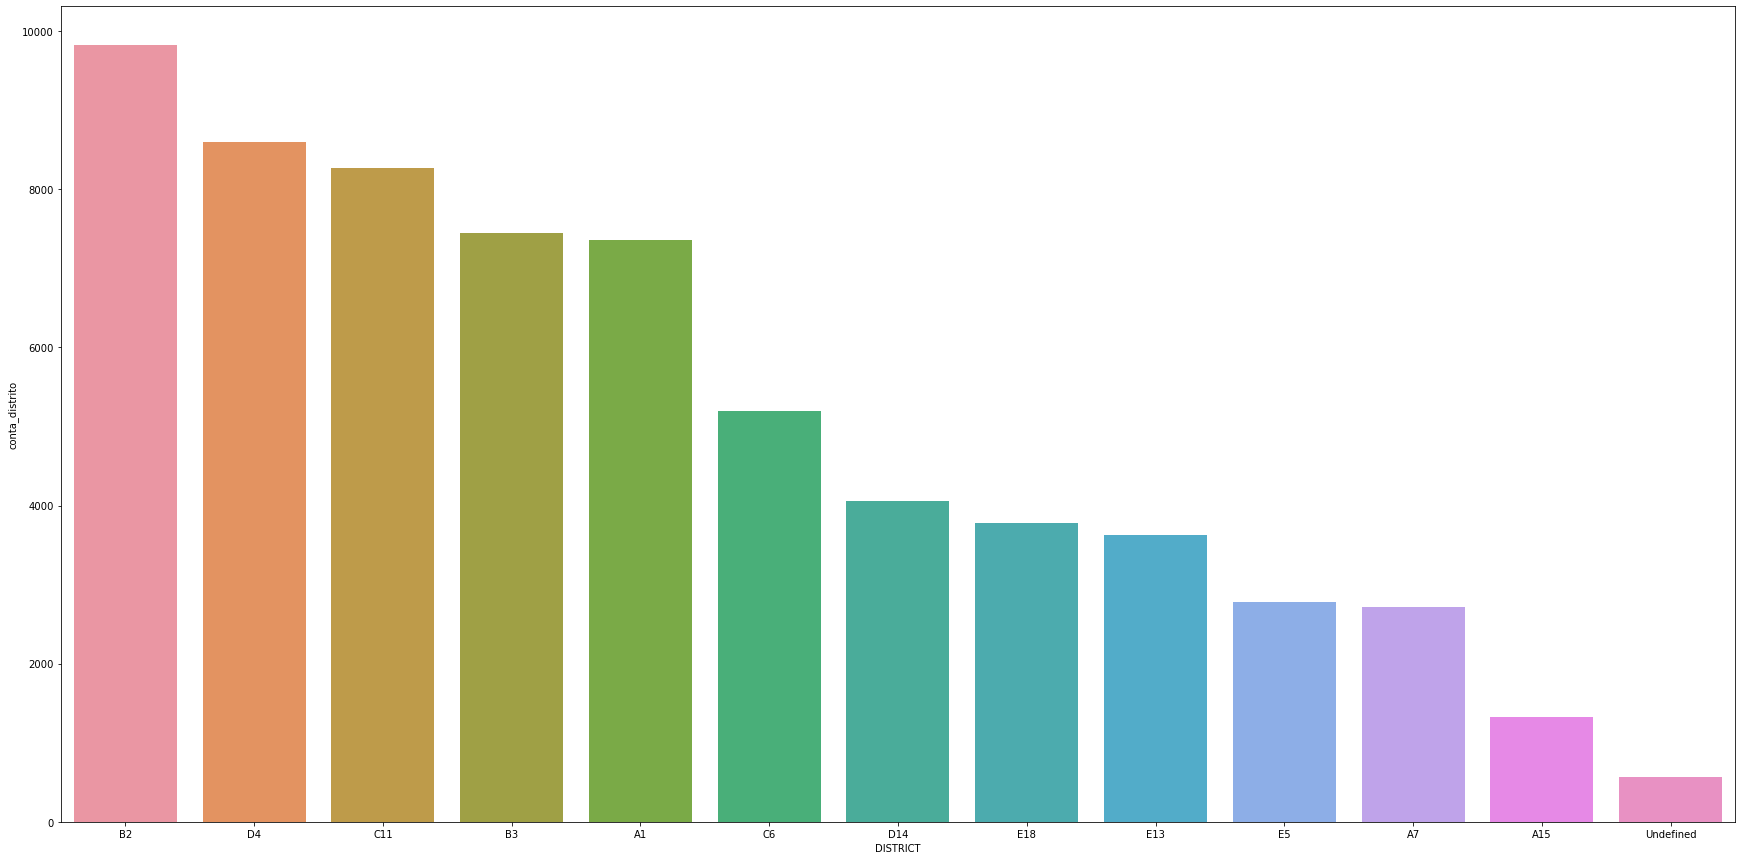

In [17]:
grafico1=pd.DataFrame(distrito,columns=['DISTRICT'])
grafico1['conta_distrito']=conta_distrito
grafico1 = grafico1.sort_values(['conta_distrito'], ascending=False)
plt.figure(figsize=(30,15))
sns.barplot(grafico1.DISTRICT, grafico1.conta_distrito)

Vamos agora fazer as verificações das distribuições dos dados nos anos, meses, dias da semana e horas.

In [18]:
anos= crimes['YEAR'].unique()

In [19]:
anos

array([2018, 2017, 2016, 2015], dtype=int64)

In [20]:
conta_anos=[]
for ano in anos:
    conta_anos.append(crimes[crimes['YEAR']==ano].count()['ID'])

In [21]:
conta_anos

[64921, 543, 54, 16]

Observamos que nos anos de 2015, 2016 e 2017 a quantidade de dados é significativamente menor que em 2018. Pode ser razoável trabalhar apenas com os dados de 2018.
<br>Vamos agora verificar como está a distribuição pelos meses.

In [22]:
meses=crimes['MONTH'].unique()

In [23]:
meses=np.sort(meses)

In [24]:
meses

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [25]:
conta_mes=[]
for mes in meses:
    conta_mes.append(crimes[crimes['MONTH']==mes].count()['ID'])

In [26]:
conta_mes

[7174, 6934, 7733, 7920, 8918, 8852, 8551, 8358, 718, 75, 75, 226]

Vemos que os meses 9, 10, 11 e 12 possuem significativamente menos dados que os demais. A análise mais detalhada será feita para o distrito B2.
<br>Vamos verificar agora a distribuição pelos dias da semana.

In [27]:
dias_semana=crimes['DAY_OF_WEEK'].unique()

In [28]:
dias_semana

array(['Sunday', 'Tuesday', 'Monday', 'Saturday', 'Friday', 'Wednesday',
       'Thursday'], dtype=object)

In [29]:
conta_dia=[]
for dia in dias_semana:
    conta_dia.append(crimes[crimes['DAY_OF_WEEK']==dia].count()['ID'])

In [30]:
conta_dia

[8226, 9400, 9351, 9279, 10037, 9504, 9737]

Os dados pelos dias da semana parecem estar bem distribuidos. A análise mais detalhada será feita para o distrito B2.
<br>Vamos verificar a distribuição das horas. 

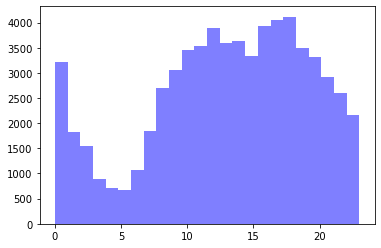

In [31]:
num_bins = 24
n, bins, patches = plt.hist(crimes['HOUR'], num_bins, facecolor='blue', alpha=0.5)
plt.show()

Aparentemente, os dados estão bem distribuidos. Será feita uma análise mais detalhada para os dados do distrito B2.

A partir de agora a análise será feita apenas para os dados do distrito B2. Vamos filtrar a base de dados para o distrito B2, atribuir ao dataframe crimesB2, contar os valores para ver quantos dados faltantes temos e ver as estatísticas descritivas para verificar os valores.

In [32]:
crimesB2inic=crimes[crimes['DISTRICT']=='B2']

In [33]:
crimesB2inic.count()

INCIDENT_NUMBER        9823
OFFENSE_CODE           9823
OFFENSE_CODE_GROUP     9823
OFFENSE_DESCRIPTION    9823
DISTRICT               9823
REPORTING_AREA         9823
SHOOTING                 66
OCCURRED_ON_DATE       9823
YEAR                   9823
MONTH                  9823
DAY_OF_WEEK            9823
HOUR                   9823
UCR_PART               9818
STREET                 9697
Lat                    9096
Long                   9096
Location               9823
ID                     9823
dtype: int64

In [34]:
crimesB2inic.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long,ID
count,9823.000000,9823.000000,9823.000000,9823.000000,9096.000000,9096.000000,9823.000000
mean,2404.181615,2017.994299,4.709559,13.193933,42.316821,-71.076625,32937.917948
std,1158.172349,0.080520,2.303406,6.335650,0.454324,0.734918,18858.363718
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.112843,7.000000
25%,1304.000000,2018.000000,3.000000,9.000000,42.314287,-71.090495,16657.000000
50%,3006.000000,2018.000000,5.000000,14.000000,42.321300,-71.083592,33241.000000
75%,3301.000000,2018.000000,7.000000,18.000000,42.329326,-71.077220,49104.000000
max,3831.000000,2018.000000,12.000000,23.000000,42.392146,-1.000000,65523.000000


Vemos que a quantidade de dados faltantes quando comparada ao total de dados é pequena, o que permite que apenas excluamos esses valores faltantes. Vamos também substituir os valores -1 da latitude e longitude para NaN para excluí-los também, por serem dados inválidos.

In [35]:
crimesB2inic['Lat'].replace(-1,None, inplace=True)

In [36]:
crimesB2inic['Long'].replace(-1,None, inplace=True)

In [37]:
crimesB2inic.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long,ID
count,9823.000000,9823.000000,9823.000000,9823.000000,9096.000000,9096.000000,9823.000000
mean,2404.181615,2017.994299,4.709559,13.193933,42.321583,-71.084329,32937.917948
std,1158.172349,0.080520,2.303406,6.335650,0.009068,0.010392,18858.363718
min,111.000000,2015.000000,1.000000,0.000000,42.283405,-71.112843,7.000000
25%,1304.000000,2018.000000,3.000000,9.000000,42.314287,-71.090495,16657.000000
50%,3006.000000,2018.000000,5.000000,14.000000,42.321300,-71.083592,33241.000000
75%,3301.000000,2018.000000,7.000000,18.000000,42.329326,-71.077240,49104.000000
max,3831.000000,2018.000000,12.000000,23.000000,42.392146,-71.008939,65523.000000


In [38]:
crimesB2=crimesB2inic.dropna(subset=['UCR_PART','Lat','Long'])

In [39]:
crimesB2.count()

INCIDENT_NUMBER        9091
OFFENSE_CODE           9091
OFFENSE_CODE_GROUP     9091
OFFENSE_DESCRIPTION    9091
DISTRICT               9091
REPORTING_AREA         9091
SHOOTING                 64
OCCURRED_ON_DATE       9091
YEAR                   9091
MONTH                  9091
DAY_OF_WEEK            9091
HOUR                   9091
UCR_PART               9091
STREET                 9054
Lat                    9091
Long                   9091
Location               9091
ID                     9091
dtype: int64

Após o tratamento dos dados vemos que as informações de rua possuem valores faltantes, mas como temos as informações de latitude e longitude esses dados da rua não serão utilizados.

Vamos iniciar vendo como os dados estão distribuidos pelos anos.

In [40]:
anosB2=crimesB2['YEAR'].unique()

<BarContainer object of 4 artists>

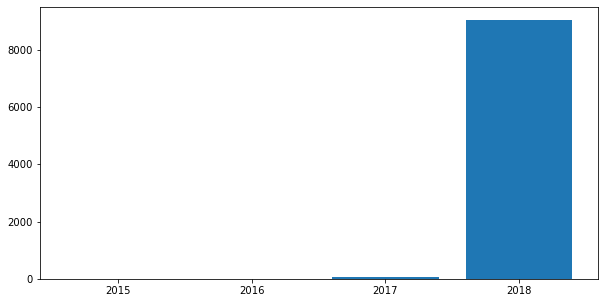

In [41]:
conta_anosB2=[]
for ano in anosB2:
    conta_anosB2.append(crimesB2[crimesB2['YEAR']==ano].count()['ID'])
plt.figure(figsize=(10,5))
plt.xticks(anosB2)
plt.bar(anosB2,conta_anosB2)

Os dados estão bastante concentrados em 2018. O próximo passo é ver como os crimes se distribuem pelos meses.

<BarContainer object of 12 artists>

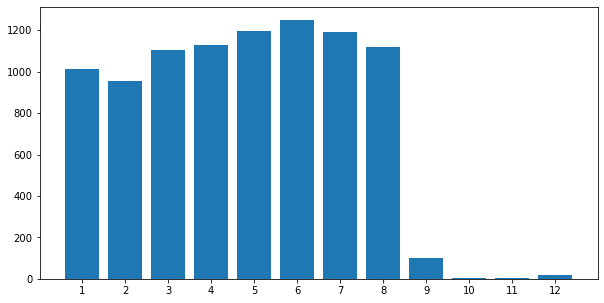

In [42]:
meses=list(range(1,13))
conta_meses=[]
for mes in meses:
    conta_meses.append(crimesB2[crimesB2['MONTH']==mes].count()['ID'])
plt.figure(figsize=(10,5))
plt.xticks(list(range(1,13)))
plt.bar(meses,conta_meses)

Sendo 2018 o ano que mais temos dados, vamos verificar se temos dados para todos os meses desse ano. Se tivermos o ano de 2018 completo, seria a opção mais interessante para trabalhar.

In [43]:
crimes_meses2018=crimesB2[crimesB2['YEAR']==2018]

<BarContainer object of 12 artists>

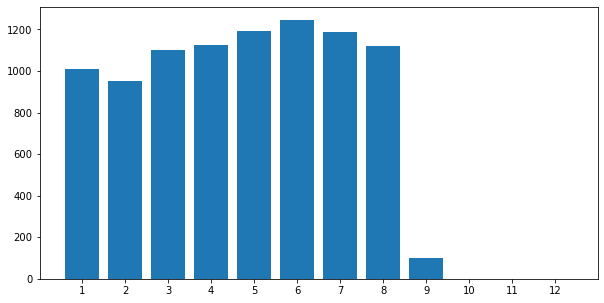

In [44]:
conta_meses2018=[]
for mes in meses:
    conta_meses2018.append(crimes_meses2018[crimes_meses2018['MONTH']==mes].count()['ID'])
plt.figure(figsize=(10,5))
plt.xticks(list(range(1,13)))
plt.bar(meses,conta_meses2018)

Infelizmente não temos todos os dados de 2018 e a quantidade de dados dos anos anteriores não é significativa para uma análise adequada. 
<br>Trabalharemos apenas com os dados de 2018 e para os meses que estão disponíveis.

### Análises e Conclusões

In [45]:
crimesB2 = crimesB2[crimesB2['YEAR']==2018]

In [46]:
crimesB2.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long,ID
count,9039.000000,9039.0,9039.000000,9039.000000,9039.000000,9039.000000,9039.000000
mean,2374.784158,2018.0,4.683040,13.236531,42.321579,-71.084321,32899.972895
std,1155.714056,0.0,2.281353,6.287079,0.009069,0.010384,18866.250535
min,111.000000,2018.0,1.000000,0.000000,42.283405,-71.112843,7.000000
25%,1107.000000,2018.0,3.000000,9.000000,42.314278,-71.090429,16620.000000
50%,3001.000000,2018.0,5.000000,14.000000,42.321300,-71.083592,33191.000000
75%,3208.000000,2018.0,7.000000,18.000000,42.329298,-71.077246,49086.000000
max,3831.000000,2018.0,9.000000,23.000000,42.392146,-71.008939,65523.000000


Vamos verificar a média de crimes por mês e fazer testes de hipóteses para entender melhor em quais meses a diferença na quantidade de crimes é estatísticamente significativa.

In [47]:
mes=pd.DataFrame({'Mes':meses, 'Total':conta_meses2018})

In [48]:
mes.describe()

,Mes,Total
count,12.000000,12.000000
mean,6.500000,753.250000
std,3.605551,544.332473
min,1.000000,0.000000
25%,3.750000,73.500000
50%,6.500000,1056.000000
75%,9.250000,1142.000000
max,12.000000,1246.000000


In [49]:
mes

,Mes,Total
0,1,1012
1,2,954
2,3,1100
3,4,1127
4,5,1195
5,6,1246
6,7,1187
7,8,1120
8,9,98
9,10,0


Há um ponto importante neste caso. Quando solicitamos essa média, ela é calculada utilizando os valores de todos os meses. Vamos remover os últimos 4 meses para ter uma média mais coerente. 

In [50]:
mes.loc[:7,:].describe()

,Mes,Total
count,8.00000,8.000000
mean,4.50000,1117.625000
std,2.44949,96.816376
min,1.00000,954.000000
25%,2.75000,1078.000000
50%,4.50000,1123.500000
75%,6.25000,1189.000000
max,8.00000,1246.000000


Vemos que a média de crimes por mês é 1118 e o total de crimes 9039. Vamos fazer os testes de hipóteses.

In [51]:
contador=0
for i_mes in mes['Total']:
    count = i_mes
    nobs = 9039
    value = 1118/9039
    stat, pval = proportions_ztest(count, nobs, value, alternative='two-sided')
    if pval > 0.05:
        print("A diferença da média de {} NÃO É significativa.".format(mes['Mes'][contador]))
    elif pval <0.05:
        print("A diferença da média de {} É significativa.".format(mes['Mes'][contador]))
    contador+=1
    if contador == 8:
        break

A diferença da média de 1 É significativa.
A diferença da média de 2 É significativa.
A diferença da média de 3 NÃO É significativa.
A diferença da média de 4 NÃO É significativa.
A diferença da média de 5 É significativa.
A diferença da média de 6 É significativa.
A diferença da média de 7 É significativa.
A diferença da média de 8 NÃO É significativa.


Podemos verificar que as médias dos meses 1 e 2 são significativamente menores que a média de crimes mensal e as médias dos meses 5, 6 e 7 são significativamente maiores.

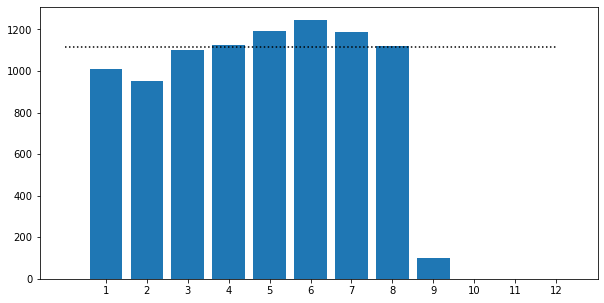

In [52]:
plt.figure(figsize=(10,5))
plt.xticks(list(range(1,13)))
plt.bar(meses,conta_meses2018)
plt.hlines(1118,0,12, linestyles='dotted')

Vamos ver agora como são distribuidas as ocorrências por dia da semana.

Neste ponto, faremos a contagem de ocorrências por dia da semana.

In [53]:
dias=['Sunday','Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday']
conta_dia=[]
for dia in dias:
    conta_dia.append(crimesB2[crimesB2['DAY_OF_WEEK']==dia].count()['ID'])

In [54]:
hist_dia = pd.DataFrame({'Total':conta_dia,'DiaSemana':dias})
hist_dia['DiaPt']=['Domingo','Segunda-feira','Terça-feira','Quarta-feira','Quinta-feira','Sexta-feira','Sábado']

In [55]:
hist_dia

,Total,DiaSemana,DiaPt
0,1082,Sunday,Domingo
1,1289,Monday,Segunda-feira
2,1296,Tuesday,Terça-feira
3,1391,Wednesday,Quarta-feira
4,1322,Thursday,Quinta-feira
5,1407,Friday,Sexta-feira
6,1252,Saturday,Sábado


<BarContainer object of 7 artists>

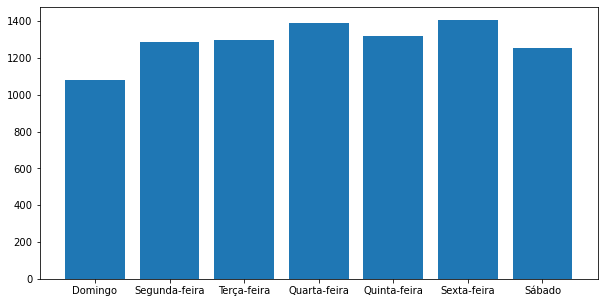

In [56]:
plt.figure(figsize=(10,5))
plt.bar(hist_dia['DiaPt'],conta_dia)

In [57]:
print(hist_dia.sum())
hist_dia.describe()

Total                                                     9039
DiaSemana    SundayMondayTuesdayWednesdayThursdayFridaySatu...
DiaPt        DomingoSegunda-feiraTerça-feiraQuarta-feiraQui...
dtype: object


,Total
count,7.000000
mean,1291.285714
std,107.739987
min,1082.000000
25%,1270.500000
50%,1296.000000
75%,1356.500000
max,1407.000000


A média da amostra é 1291 crimes. Vamos realizar testes de hipóteses para verificar se a média de crimes em um determinado dia da semana é significativamente diferente dos demais. Vamos realizar o teste bi-caudal para nos trazer o resultado se a média é diferente ou não.

In [58]:
contador=0
for dia in hist_dia['Total']:
    count = dia
    nobs = 9039
    value = 1291/9039
    stat, pval = proportions_ztest(count, nobs, value, alternative='two-sided')
    if pval > 0.05:
        print("A diferença da média de {} NÃO É significativa.".format(hist_dia['DiaPt'][contador]))
    elif pval <0.05:
        print("A diferença da média de {} É significativa.".format(hist_dia['DiaPt'][contador]))
    contador+=1

A diferença da média de Domingo É significativa.
A diferença da média de Segunda-feira NÃO É significativa.
A diferença da média de Terça-feira NÃO É significativa.
A diferença da média de Quarta-feira É significativa.
A diferença da média de Quinta-feira NÃO É significativa.
A diferença da média de Sexta-feira É significativa.
A diferença da média de Sábado NÃO É significativa.


Portanto, podemos concluir que no domingo, na quarta-feira e na sexta-feira, existe diferença significativa na média de ocorrências. Observando os dados, vemos que no domingo a média é significativamente menor e na quarta-feira e na sexta-feira as médias são maiores. 

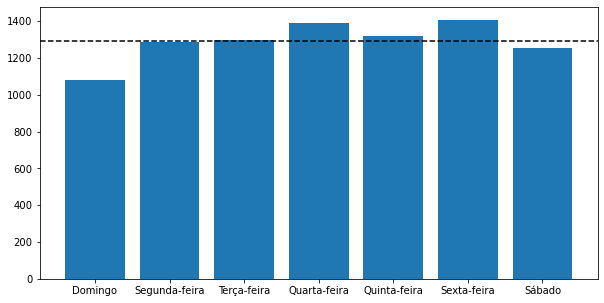

In [59]:
plt.figure(figsize=(10,5))
plt.bar(hist_dia['DiaPt'],conta_dia)
plt.axhline(1291, linestyle=('--'), color='black')

Vamos agora separar os horários que os crimes ocorreram em cada dia.

Separando os dados pelos dias em que ocorreram temos:

In [60]:
dados_domingo=crimesB2[crimesB2['DAY_OF_WEEK']=='Sunday']
dados_segunda=crimesB2[crimesB2['DAY_OF_WEEK']=='Monday']
dados_terca=crimesB2[crimesB2['DAY_OF_WEEK']=='Tuesday']
dados_quarta=crimesB2[crimesB2['DAY_OF_WEEK']=='Wednesday']
dados_quinta=crimesB2[crimesB2['DAY_OF_WEEK']=='Thursday']
dados_sexta=crimesB2[crimesB2['DAY_OF_WEEK']=='Friday']
dados_sabado=crimesB2[crimesB2['DAY_OF_WEEK']=='Saturday']

Dessa forma, podemos verificar a distribuição dos horários das ocorrências pelos dias da semana. Os gráficos estão na mesma escala para facilitar a comparação.

(0.0, 130.0)

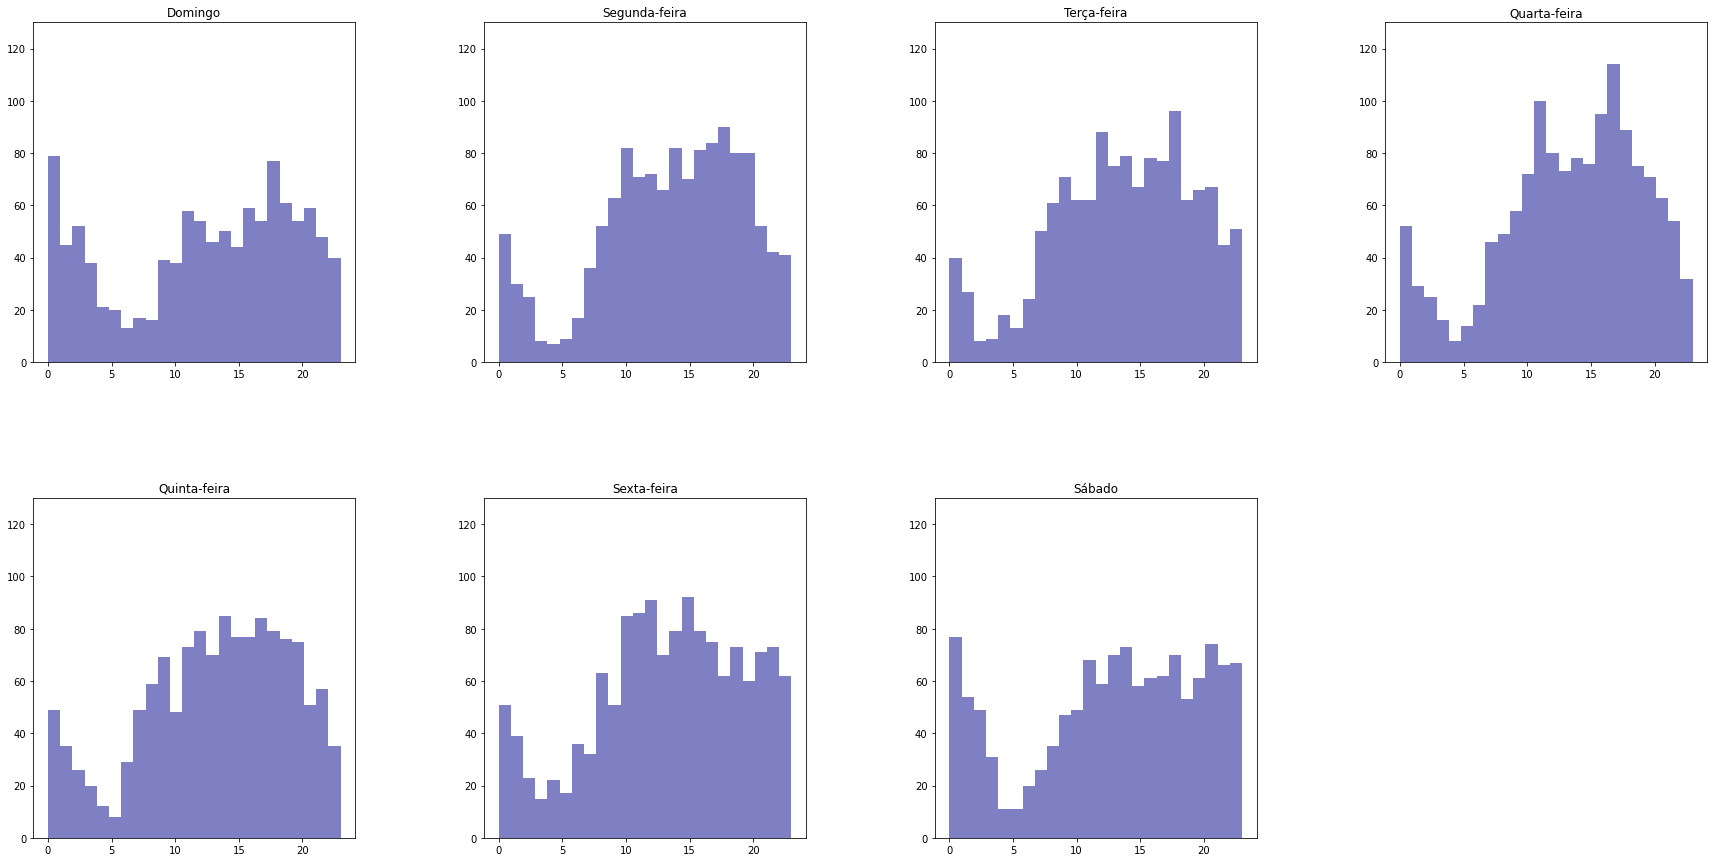

In [61]:
fig =  plt.figure(figsize=(30,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(2,4,1)
num_bins = 24
n, bins, patches = plt.hist(dados_domingo['HOUR'], num_bins, facecolor='darkblue', alpha=0.5)
plt.title('Domingo')
plt.ylim(0,130)
plt.subplot(2,4,2)
n, bins, patches = plt.hist(dados_segunda['HOUR'], num_bins, facecolor='darkblue', alpha=0.5)
plt.title('Segunda-feira')
plt.ylim(0,130)
plt.subplot(2,4,3)
n, bins, patches = plt.hist(dados_terca['HOUR'], num_bins, facecolor='darkblue', alpha=0.5)
plt.title('Terça-feira')
plt.ylim(0,130)
plt.subplot(2,4,4)
n, bins, patches = plt.hist(dados_quarta['HOUR'], num_bins, facecolor='darkblue', alpha=0.5)
plt.title('Quarta-feira')
plt.ylim(0,130)
plt.subplot(2,4,5)
n, bins, patches = plt.hist(dados_quinta['HOUR'], num_bins, facecolor='darkblue', alpha=0.5)
plt.title('Quinta-feira')
plt.ylim(0,130)
plt.subplot(2,4,6)
n, bins, patches = plt.hist(dados_sexta['HOUR'], num_bins, facecolor='darkblue', alpha=0.5)
plt.title('Sexta-feira')
plt.ylim(0,130)
plt.subplot(2,4,7)
n, bins, patches = plt.hist(dados_sabado['HOUR'], num_bins, facecolor='darkblue', alpha=0.5)
plt.title('Sábado')
plt.ylim(0,130)

Podemos verificar alguns pontos interessantes:
- No geral, as ocorrências se concentram das 8:00 às 00:00 com o pico por volta das 15:00.

Vendo algumas semelhanças mais específicas:
- No domingo, as ocorrências são menores durante o dia, mas maiores durante a madrugada de sábado para domingo.
- No sábado vemos um efeito parecido com o domingo, com muitos casos na madrugada de sexta-feira para sábado.
- Vemos um aumento também na sexta-feira a noite.

Isso nos leva a crer que nos fins de semana as pessoas saem mais a noite e podem ter mais problemas.

Observando outro pontos interessantes:
- Na quarta-feira há um número maior de acidentes, que vai até quinta-feira de manhã. Pode ser relacionado com eventos esportivos que podem acontecer nesse dia, como jogos de baseball, basquete ou hockey.